In [144]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib import ticker, cm

In [187]:
def mk_quad(epsilon=0.3): 
    f = lambda x : 0.33*(x[0]**2 + (epsilon**2)*(x[1]**2))
    grad = lambda x: np.array([0.66*x[0], 0.66*(epsilon**2)*x[1]])
    hess = lambda x: np.array([[0.66, 0.], [0., 0.66*(epsilon**2)]])
    return f, grad, hess

In [188]:
f, grad, hess = mk_quad(0.7)

In [146]:
def plot_2d_traj( x_lim, y_lim, f, trj=None, tle="", nl=15, log=False) : 
    x = np.linspace(x_lim[0], x_lim[1], 100) 
    y = np.linspace(y_lim[0], y_lim[1], 100)
    X, Y = np.meshgrid(x, y)
    fdata = f((X,Y))
    if log : 
        surf = plt.contour(X, Y, fdata,nl, locator=plt.LogLocator())
        fmt = ticker.LogFormatterMathtext()
        fmt.create_dummy_axis()
        plt.colorbar(surf, shrink=0.9)
        plt.clabel(surf,surf.levels,use_clabeltext=True,fmt=fmt)
    
    else : 
        surf = plt.contour(X, Y, fdata, nl)
        plt.colorbar(surf, shrink=0.5)
        plt.clabel(surf, fmt="%2.1f", use_clabeltext=True)
    if trj : 
        plt.plot(trj[0], trj[1], "r-->", label=r"$f(x_k + \alpha p_k)$")
    plt.title(tle)

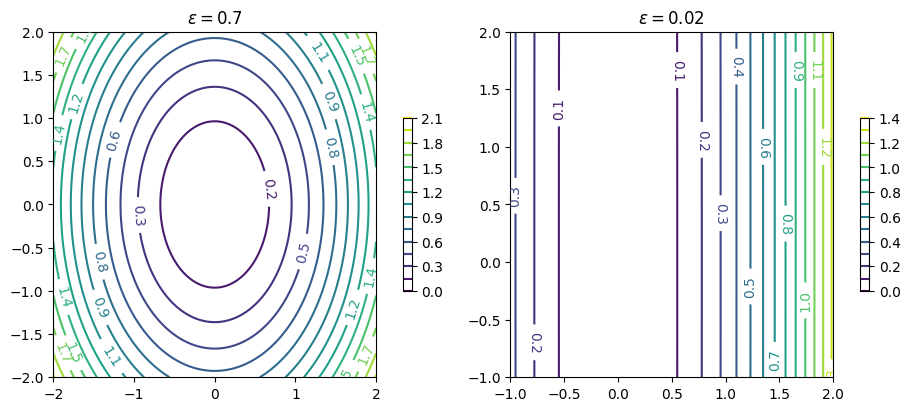

In [142]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
plot_2d_traj((-2,2), (-2,2), f, tle="$\\epsilon=0.7$")

ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$")

In [126]:
def grad_desc_2d(x0, f, grad, step, tau=0.5, max_step=100, max_back=10, tol = 1e-10):
    x_i = x0
    all_x_i = [x_i[0]]
    all_y_i = [x_i[1]]
    all_f_i = [f(x_i)]
    for i in range(max_step):
        dx_i = grad(x_i)
        for j in range(max_back):
            new_x_i = x_i - dx_i * step
            new_f_i = f(new_x_i)
            if (new_f_i < all_f_i[-1]):
                break
            step = step * tau
        x_i, f_i = new_x_i, new_f_i
        all_x_i.append(x_i[0])
        all_y_i.append(x_i[1])
        all_f_i.append(f_i)
        if np.sqrt(np.sum(dx_i**2)) < tol:
            break
    return all_x_i, all_y_i, all_f_i


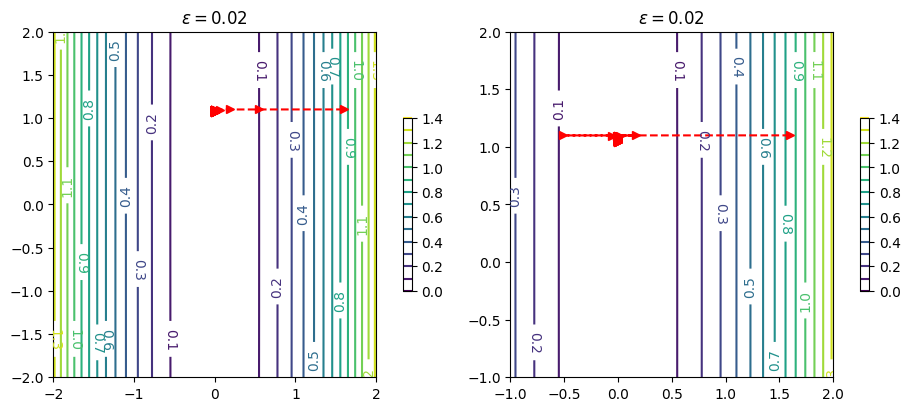

In [137]:
f_illed, grad_illed, hess_illed = mk_quad(0.02)

figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_illed1 = grad_desc_2d(np.array([1.6, 1.1]), f_illed, grad_illed, step=1)
plot_2d_traj((-2,2), (-2,2), f_illed, tle="$\\epsilon=0.02$", trj=opt_illed1)


opt_illed2 = grad_desc_2d(np.array([1.6, 1.1]), f_illed, grad_illed, step=2)
ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$", trj=opt_illed2)

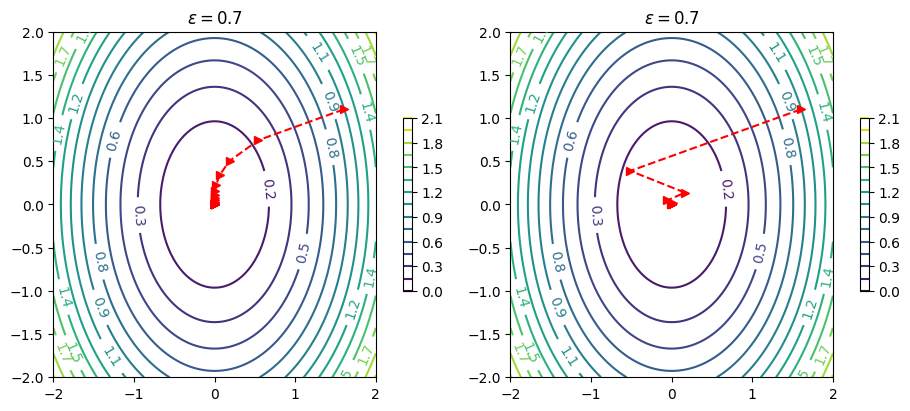

In [134]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_well = grad_desc_2d(np.array([1.6, 1.1]), f, grad, step=1)
plot_2d_traj((-2,2), (-2,2), f, tle="$\\epsilon=0.7$", trj=opt_well)


ax = figure.add_subplot(gs[0,1])
opt_well = grad_desc_2d(np.array([1.6, 1.1]), f, grad, step=2)
plot_2d_traj((-2,2), (-2,2), f, tle="$\\epsilon=0.7$", trj=opt_well)

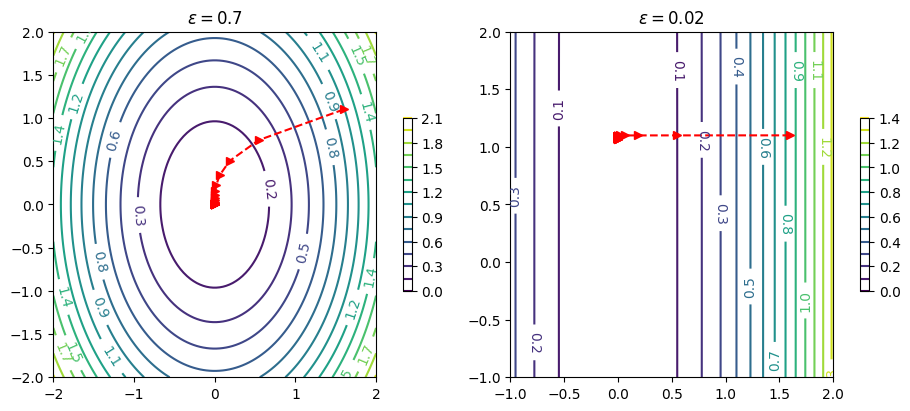

In [132]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_well = grad_desc_2d(np.array([1.6, 1.1]), f, grad, step=1)
plot_2d_traj((-2,2), (-2,2), f, tle="$\\epsilon=0.7$", trj=opt)

f_illed, grad_illed, hess_illed = mk_quad(0.02)
opt_illed = grad_desc_2d(np.array([1.6, 1.1]), f_illed, grad_illed, step=1)
ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$", trj=opt_illed)

In [224]:
def mk_rosenbrock(a=None): 
    f = lambda x : (1.-x[0])**2 + 100.0*((x[-1]-(x[0]**2))**2)
    grad = lambda x: np.array([-2*(1-x[0])+400*x[0]*(x[-1]-x[0]**2), 200*(x[-1] - x[0]**2)])
    hess = lambda x: np.array([[2-400*(x[-1] - 3*x[0]), -400*x[0]], [-400*x[0], 200.]])
    return f, grad, hess

In [139]:
f_rb, grad_rb, hess_rb = mk_rosenbrock()

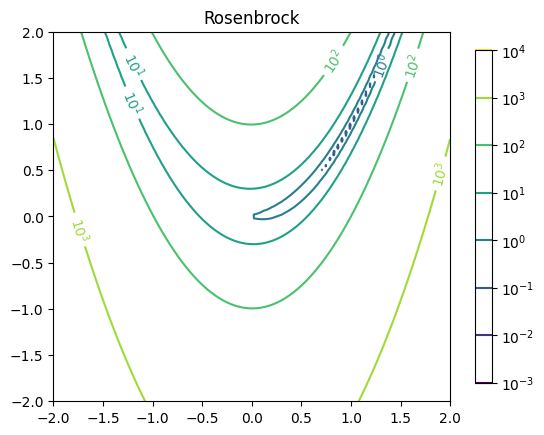

In [147]:
plot_2d_traj((-2,2), (-2,2), f_rb, tle="Rosenbrock", log=True)

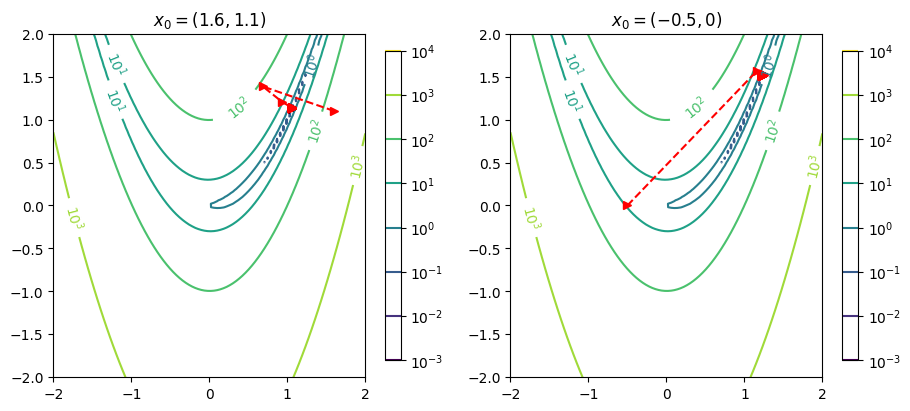

In [156]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_rb = grad_desc_2d(np.array([1.6, 1.1]), f_rb, grad_rb, step=0.25)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (1.6, 1.1)$", trj=opt_rb, nl=100, log=True)

ax = figure.add_subplot(gs[0,1])
opt_rb = grad_desc_2d(np.array([-0.5, 0]), f_rb, grad_rb, step=0.25)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (-0.5, 0)$", trj=opt_rb, nl=100, log=True)


In [197]:
def newtons_method(x0, f, grad, hess, max_iter=100, max_back=10, tol=1e-8):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    x_i = x0
    for i in range(max_iter):
        g_i = grad(x_i)
        
        step = - np.linalg.solve(hess(x_i), g_i)
        for j in range(max_back):
            new_x_i = x_i + step
            new_f_i = f(new_x_i)
            if (new_f_i < all_f_i[-1]):
                break
            
            step /= 2
            
        x_i, f_i = new_x_i, new_f_i
        
        all_x_i.append(x_i[0])
        all_y_i.append(x_i[1])
        all_f_i.append(f_i)
        
        if np.sqrt(np.sum(g_i**2)) < tol:
            break
    return all_x_i, all_y_i, all_f_i

In [198]:
f, grad, hess = mk_quad(0.02)
opt_well = newtons_method(np.array([-0.5, 1.1]), f, grad, hess)
opt_well 

([-0.5, 0.0, 0.0], [1.1, 0.0, 0.0], [0.08265971999999999, 0.0, 0.0])

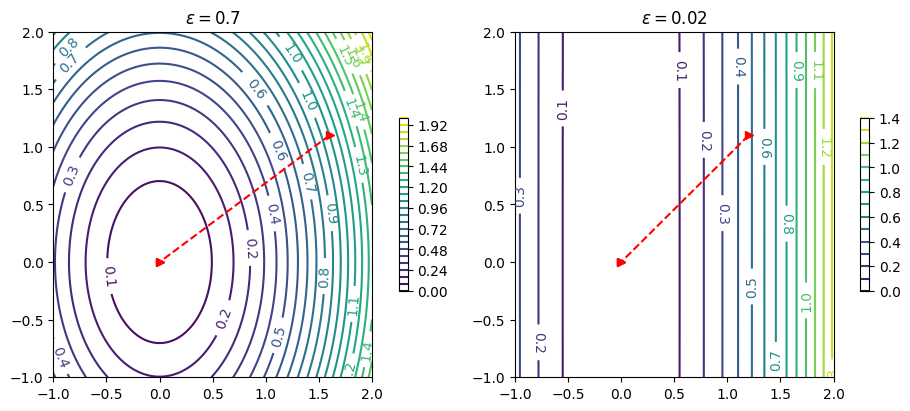

In [207]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
f, grad, hess = mk_quad(0.7)
opt_well = newtons_method(np.array([1.6, 1.1]), f, grad, hess)
plot_2d_traj((-1,2), (-1,2), f, tle="$\\epsilon=0.7$", trj=opt_well, nl=30)

f_illed, grad_illed, hess_illed = mk_quad(0.02)
opt_illed = newtons_method(np.array([1.2, 1.1]), f_illed, grad_illed, hess_illed)
ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$", trj=opt_illed)

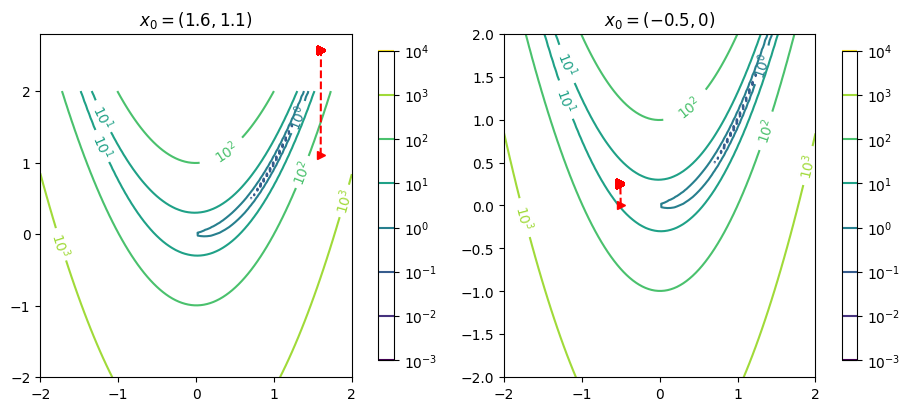

In [205]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_rb = newtons_method(np.array([1.6, 1.1]), f_rb, grad_rb, hess_rb,max_iter=1000)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (1.6, 1.1)$", trj=opt_rb, nl=100, log=True)

ax = figure.add_subplot(gs[0,1])
opt_rb = newtons_method(np.array([-0.5, 0]), f_rb, grad_rb, hess_rb, max_iter=1000)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (-0.5, 0)$", trj=opt_rb, nl=100, log=True)


In [209]:
def conjugate_gradient(x0, f, grad, hess, max_iter=100, tol=1e-18):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    x_i = x0
    r_i = grad(x0)
    p_i = -r_i
    for i in range(max_iter):
        a_i = - r_i.T @ p_i / (p_i.T @ hess(x_i) @ p_i)
        x_i_new = x_i + a_i * p_i
        r_i_new = grad(x_i_new)
        b_i = (r_i_new.T @ hess(x_i) @ p_i) / (p_i.T @ hess(x_i) @ p_i)
        p_i_new = -r_i_new + b_i * p_i
        x_i, r_i, p_i = x_i_new, r_i_new, p_i_new
        all_x_i.append(x_i[0])
        all_y_i.append(x_i[1])
        all_f_i.append(f(x_i))
        if np.sqrt(np.sum(r_i_new**2)) < tol:
            break
    return all_x_i, all_y_i, all_f_i


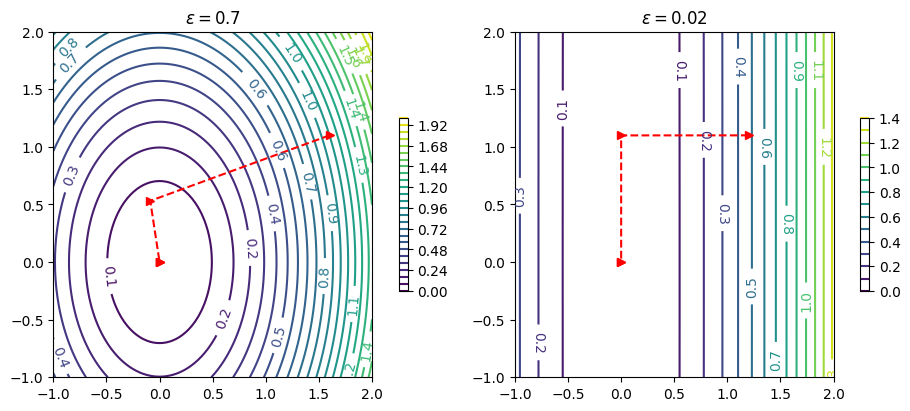

In [210]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
f, grad, hess = mk_quad(0.7)
opt_well = conjugate_gradient(np.array([1.6, 1.1]), f, grad, hess)
plot_2d_traj((-1,2), (-1,2), f, tle="$\\epsilon=0.7$", trj=opt_well, nl=30)

f_illed, grad_illed, hess_illed = mk_quad(0.02)
opt_illed = conjugate_gradient(np.array([1.2, 1.1]), f_illed, grad_illed, hess_illed)
ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$", trj=opt_illed)

/var/folders/xr/5fv2rjx15t5g4p_k7d9tqjyr0000gn/T/ipykernel_2731/3929011168.py:18: RuntimeWarning: overflow encountered in square
  if np.sqrt(np.sum(r_i_new**2)) < tol:
/var/folders/xr/5fv2rjx15t5g4p_k7d9tqjyr0000gn/T/ipykernel_2731/3929011168.py:9: RuntimeWarning: overflow encountered in matmul
  a_i = - r_i.T @ p_i / (p_i.T @ hess(x_i) @ p_i)
/var/folders/xr/5fv2rjx15t5g4p_k7d9tqjyr0000gn/T/ipykernel_2731/3929011168.py:9: RuntimeWarning: invalid value encountered in scalar divide
  a_i = - r_i.T @ p_i / (p_i.T @ hess(x_i) @ p_i)
/var/folders/xr/5fv2rjx15t5g4p_k7d9tqjyr0000gn/T/ipykernel_2731/3929011168.py:12: RuntimeWarning: overflow encountered in matmul
  b_i = (r_i_new.T @ hess(x_i) @ p_i) / (p_i.T @ hess(x_i) @ p_i)


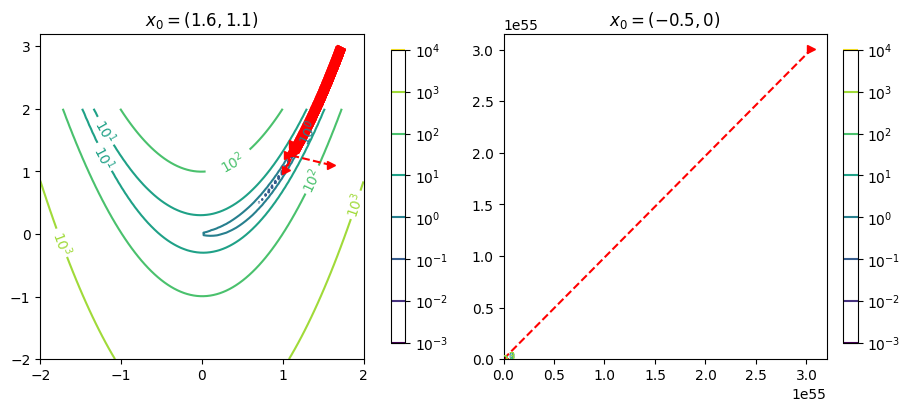

In [212]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_rb = conjugate_gradient(np.array([1.6, 1.1]), f_rb, grad_rb, hess_rb,max_iter=1000)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (1.6, 1.1)$", trj=opt_rb, nl=100, log=True)

ax = figure.add_subplot(gs[0,1])
opt_rb = conjugate_gradient(np.array([-0.5, 0]), f_rb, grad_rb, hess_rb)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (-0.5, 0)$", trj=opt_rb, nl=100, log=True)


In [213]:
def conjugate_gradient_scipy(x0, f, grad, tol=1e-8):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    scipy.optimize.minimize(
      f, x0, jac=grad, method="CG", 
      callback=store, tol=tol
    )
    return all_x_i, all_y_i, all_f_i


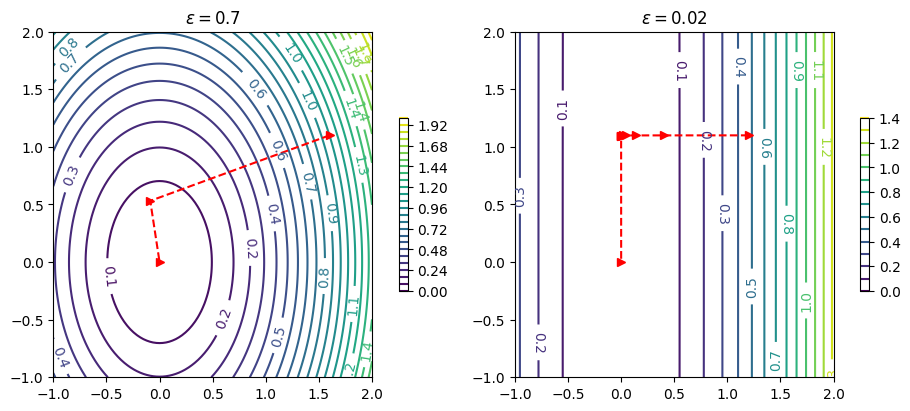

In [215]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
f, grad, hess = mk_quad(0.7)
opt_well = conjugate_gradient_scipy(np.array([1.6, 1.1]), f, grad)
plot_2d_traj((-1,2), (-1,2), f, tle="$\\epsilon=0.7$", trj=opt_well, nl=30)

f_illed, grad_illed, hess_illed = mk_quad(0.02)
opt_illed = conjugate_gradient_scipy(np.array([1.2, 1.1]), f_illed, grad_illed)
ax = figure.add_subplot(gs[0,1])
plot_2d_traj((-1,2), (-1,2), mk_quad(0.02)[0], tle="$\\epsilon=0.02$", trj=opt_illed)

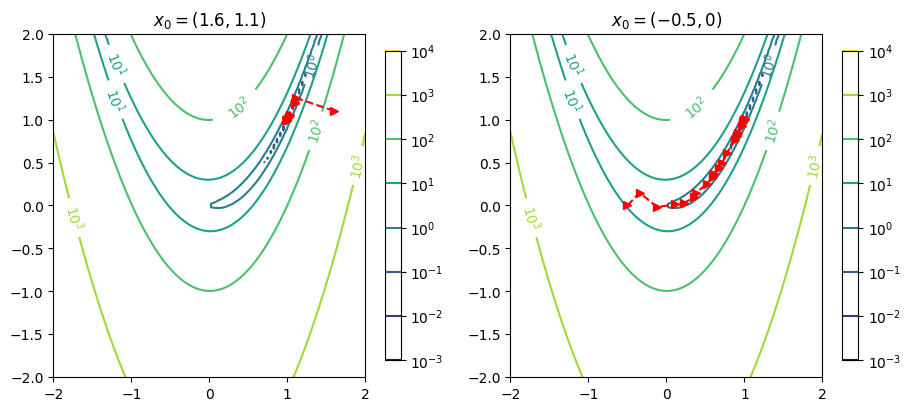

In [216]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
opt_rb = conjugate_gradient_scipy(np.array([1.6, 1.1]), f_rb, grad_rb)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (1.6, 1.1)$", trj=opt_rb, nl=100, log=True)

ax = figure.add_subplot(gs[0,1])
opt_rb = conjugate_gradient_scipy(np.array([-0.5, 0]), f_rb, grad_rb)
plot_2d_traj((-2,2), (-2,2), f_rb, tle="$x_0 = (-0.5, 0)$", trj=opt_rb, nl=100, log=True)

In [219]:
from scipy import optimize

In [235]:
f, grad, hess = mk_rosenbrock()
optimize.check_grad(f, grad, [1,1])

6.158363551077384e-06

In [231]:
def df(X):
    x = X[0]
    y = X[1]
    val1 = 400.0 * (y - x**2) * x - 2 * x
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

In [236]:
optimize.check_grad(f, df, [0,0])

1.999999985099394